<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-12-15 20:27:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  36.1MB/s    in 5.4s    

2025-12-15 20:27:40 (37.7 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


   CompTotal
0  2040000.0
1    28000.0
2    85000.0
3    50000.0
4   110000.0


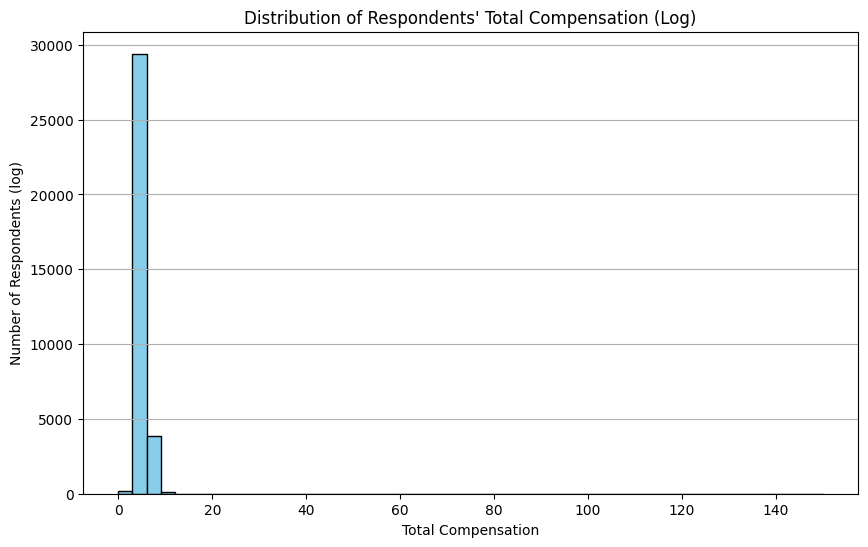

In [34]:
## Write your code here
import numpy as np
QUERY = """
SELECT CompTotal 
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
"""

df_comp = pd.read_sql_query(QUERY, conn)
print(df_comp.head())

log_comp = np.log10(df_comp['CompTotal'])

plt.figure(figsize=(10,6))
plt.hist(log_comp, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents (log)')
plt.title('Distribution of Respondents\' Total Compensation (Log)')
plt.grid(axis='y')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


  YearsCodePro  Respondents
0            1         2639
1           10         3251
2           11         1312
3           12         1777
4           13         1127


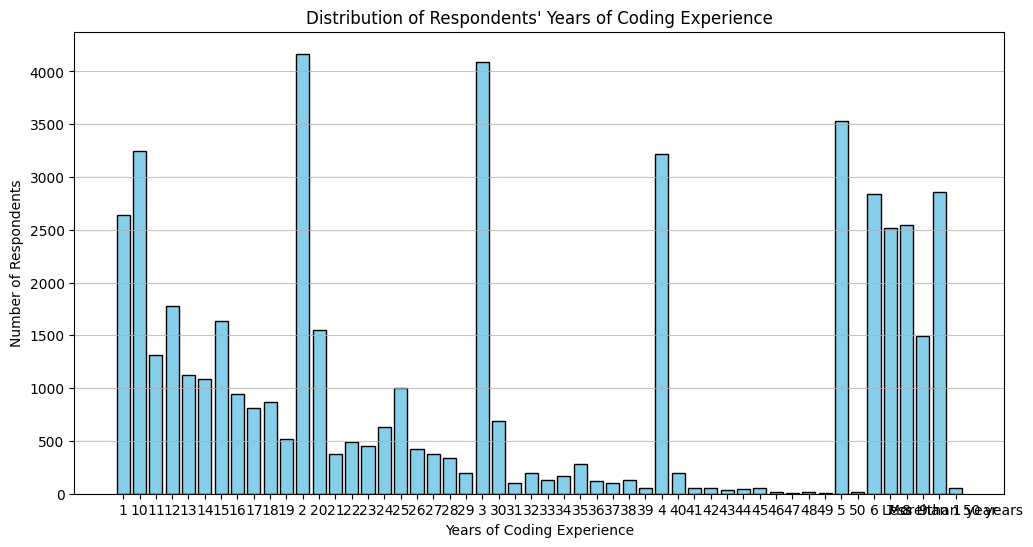

In [39]:
## Write your code here
QUERY = """
SELECT YearsCodePro, COUNT(*) AS Respondents
FROM main
WHERE YearsCodePro IS NOT NULL AND YearsCodePro > 0
GROUP BY YearsCodePro
ORDER BY YearsCodePro;
"""

df_YearsCodePro = pd.read_sql_query(QUERY, conn)
print(df_YearsCodePro.head())

plt.figure(figsize=(12,6))
plt.bar(df_YearsCodePro['YearsCodePro'], df_YearsCodePro['Respondents'], color='skyblue', edgecolor='black')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents\' Years of Coding Experience')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


               Age  CompTotal
0  18-24 years old  2040000.0
1  25-34 years old    28000.0
2  35-44 years old    85000.0
3  35-44 years old    50000.0
4  25-34 years old   110000.0 




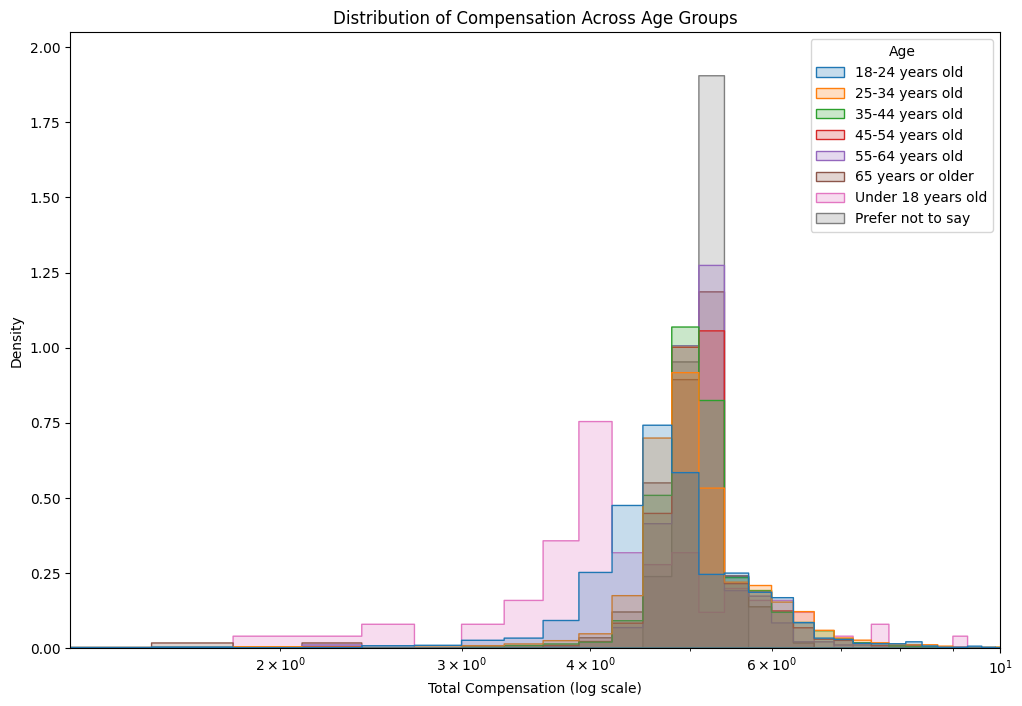

In [77]:
## Write your code here
QUERY = """ 
SELECT Age, CompTotal
From main
WHERE CompTotal IS NOT NULL AND CompTotal > 0 AND Age is NOT NULL
"""
df_Age = pd.read_sql_query(QUERY, conn)

print(df_Age.head(), "\n\n")

df_Age['LogCompTotal'] = np.log10(df_Age['CompTotal'])

plt.figure(figsize=(12,8))
sns.histplot(data=df_Age, x="LogCompTotal", hue="Age", bins=500, element="step", stat="density", common_norm=False)
plt.xscale("log")
plt.xlabel("Total Compensation (log scale)")
plt.ylabel("Density")
plt.title("Distribution of Compensation Across Age Groups")
plt.xlim(1.25, 10)
plt.ylim(0, 2.05)
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


TimeSearching             
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64 




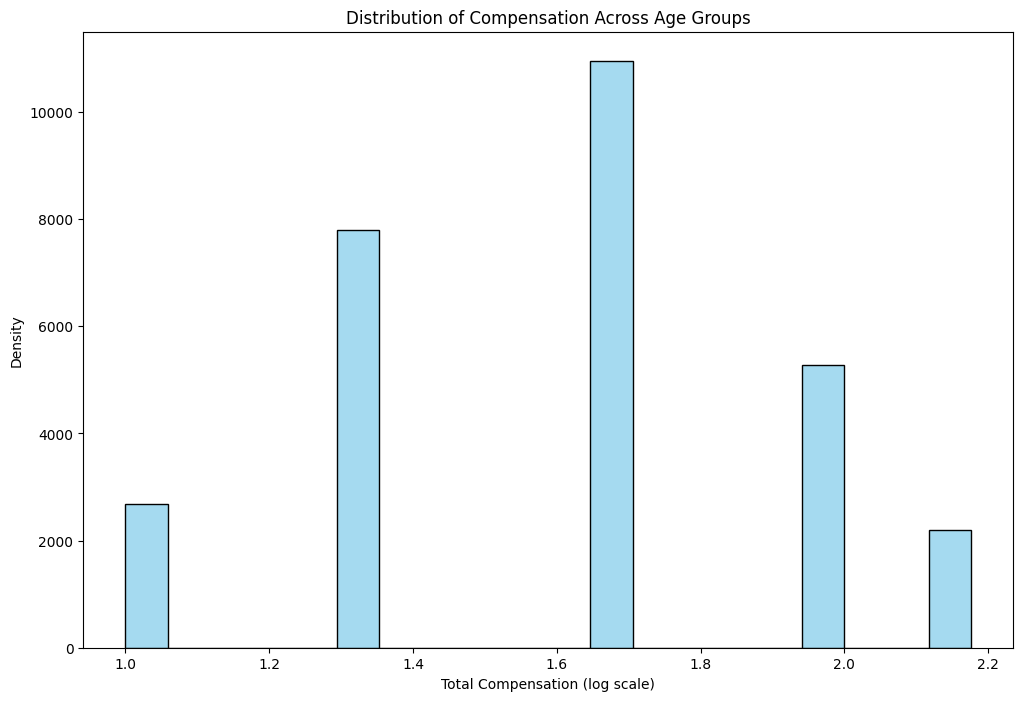

In [94]:
## Write your code here
QUERY = """ 
SELECT TimeSearching 
FROM main
WHERE TimeSearching > 0 AND TimeSearching IS NOT NULL
"""

df_Searching = pd.read_sql_query(QUERY, conn)

print(df_Searching.value_counts(), "\n\n")

mapping = {
    "Less than 15 minutes a day": 10,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}

df_Searching['TimeSearchingNum'] = df_Searching['TimeSearching'].map(mapping)

df_Searching['LogTimeSearching'] = np.log10(df_Searching['TimeSearchingNum'])

plt.figure(figsize=(12,8))
sns.histplot(data=df_Searching, x="LogTimeSearching", bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Total Compensation (log scale)")
plt.ylabel("Density")
plt.title("Distribution of Compensation Across Age Groups")
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


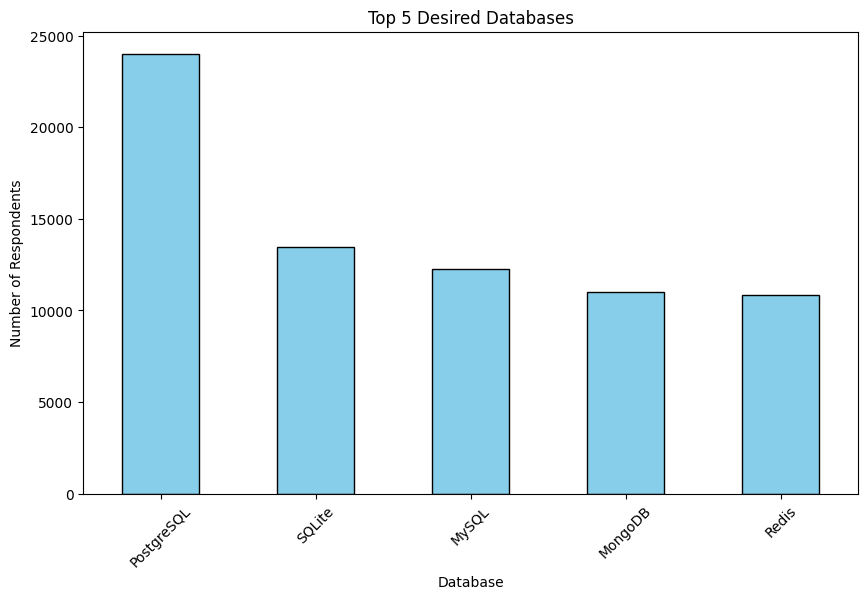

In [107]:
## Write your code here
QUERY = """ 
SELECT DatabaseWantToWorkWith 
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df_Database = pd.read_sql_query(QUERY, conn)

## split semi-colon-separated values
df_split = df_Database['DatabaseWantToWorkWith'].str.split(';')

## Flatten column into a single series
df_flat = df_split.explode().str.strip()

## Count frequencies of each desired Database people want to work with
df_count = df_flat.value_counts()
df_count_2 = df_count.head()

## select only the top 5 of that value_counts
plt.figure(figsize=(10,6))
df_count_2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Top 5 Desired Databases")
plt.xticks(rotation=45)
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


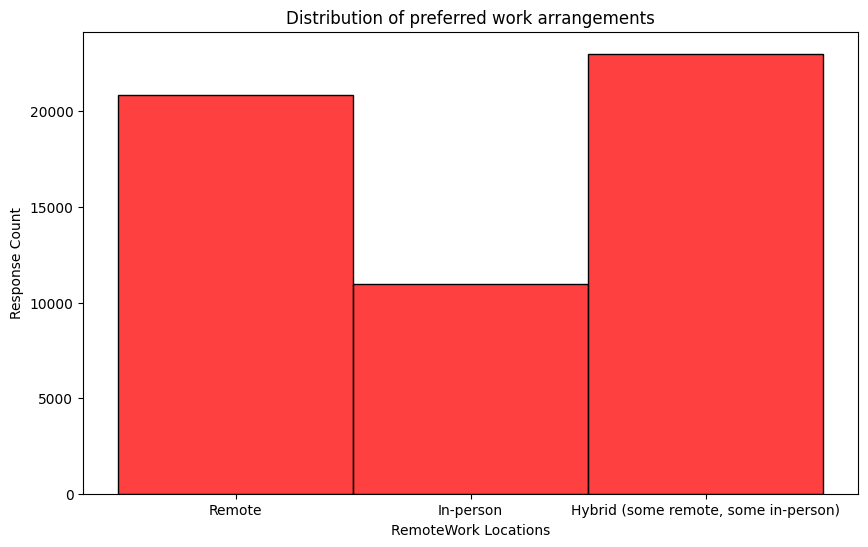

In [111]:
## Write your code here
QUERY = """ 
SELECT RemoteWork 
FROM main
WHERE RemoteWork IS NOT NULL
"""
df_RemoteWork = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
sns.histplot(data=df_RemoteWork, x='RemoteWork', color='red', edgecolor='black')
plt.xlabel("RemoteWork Locations")
plt.ylabel("Response Count")
plt.title("Distribution of preferred work arrangements")
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


CompTotal  Age            
100000.0   45-54 years old    142
150000.0   45-54 years old    139
120000.0   45-54 years old    109
200000.0   45-54 years old    107
60000.0    45-54 years old     87
                             ... 
206000.0   45-54 years old      1
208000.0   55-64 years old      1
208800.0   45-54 years old      1
209000.0   55-64 years old      1
181243.0   45-54 years old      1
Name: count, Length: 896, dtype: int64 




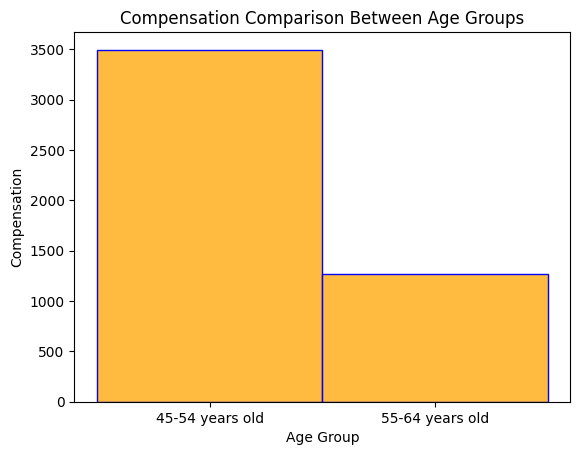

In [116]:
## Write your code here
QUERY = """ 
SELECT CompTotal, Age 
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
AND Age IS NOT NULL AND Age >= 45 AND Age <= 60
"""
df_CompTotal = pd.read_sql_query(QUERY, conn)
print(df_CompTotal.value_counts(), "\n\n")

sns.histplot(data=df_CompTotal, x="Age", color='orange', edgecolor='blue')
plt.xlabel("Age Group")
plt.ylabel("Compensation")
plt.title("Compensation Comparison Between Age Groups")
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


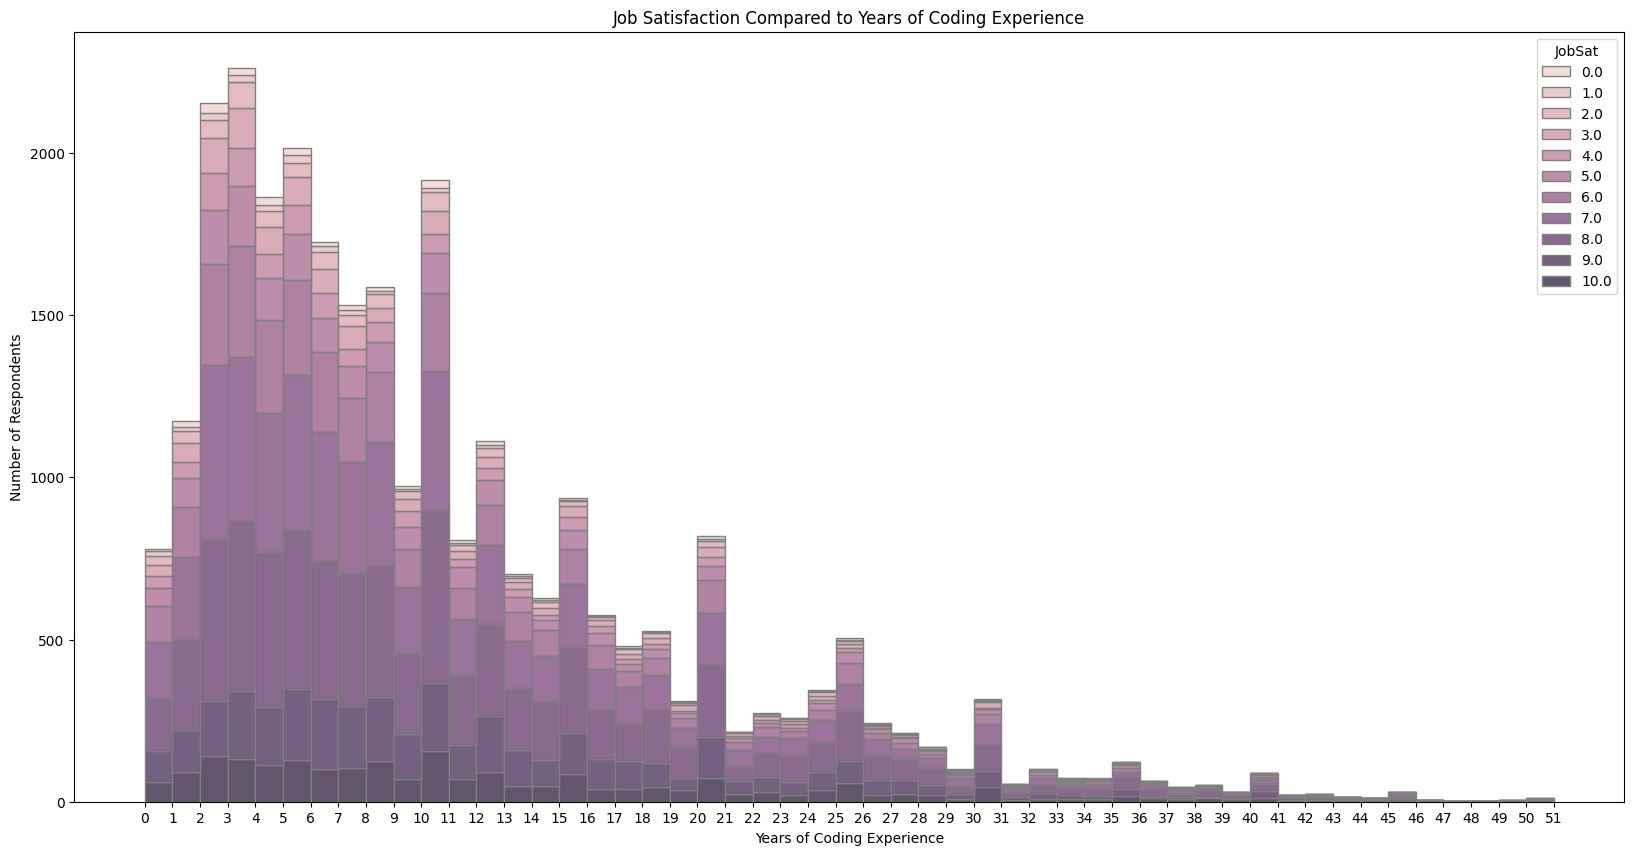

In [174]:
## Write your code here
QUERY = """ 
SELECT JobSat, YearsCodePro 
FROM main
WHERE JobSat IS NOT NULL
AND YearsCodePro IS NOT NULL AND YearsCodePro >= 0
"""
df_JobSat = pd.read_sql_query(QUERY, conn)

## Make YearsCodePro have numeric values for outliers that were objects 
df_JobSat['YearsCodePro'] = df_JobSat['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

## Transform JobSat and YearsCodePro into numeric values
df_JobSat['JobSat'] = pd.to_numeric(df_JobSat['JobSat'], errors='coerce')
df_JobSat['YearsCodePro'] = pd.to_numeric(df_JobSat['YearsCodePro'], errors='coerce')

plt.figure(figsize=(20,10))
sns.histplot(data=df_JobSat, x="YearsCodePro", hue="JobSat", bins=range(0,52), multiple='stack', color='purple', edgecolor='grey')
plt.xticks(range(0,52))
plt.xlabel("Years of Coding Experience")
plt.ylabel("Number of Respondents")
plt.title("Job Satisfaction Compared to Years of Coding Experience")
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [175]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
